In [ ]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter as c#return counts
import seaborn as sns #used for data Visualization
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.metrics import accuracy_score #model performance
import pickle #python object hierarchy is converted into a byte stream
from sklearn.ensemble import RandomForestRegressor #Regression ML algorithm
from sklearn.preprocessing import LabelEncoder #importing the Labelencoding from sklearn

In [ ]:
#Below are the commands for Importing dataset from Kaggle

!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vamshi18","key":"e528ba94a7a997933589001ee5cd730f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                 title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           9233        196  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           7178        151  1.0              
sujalsuthar/amazon-delivery-dataset                                 Amazon Delivery Dataset                              2MB  2024-07-02 03:39:48            772         25  1.0              
fahmidachowdhury/customer-segmentation-data-f

In [ ]:
#Dowmloading the Dataset...
!kaggle datasets download -d kaggle/world-development-indicators

Dataset URL: https://www.kaggle.com/datasets/kaggle/world-development-indicators
License(s): world-bank
 99% 365M/369M [00:07<00:00, 53.4MB/s]
100% 369M/369M [00:07<00:00, 53.2MB/s]


In [ ]:
#Unzipping the dataset

!unzip world-development-indicators.zip

Archive:  world-development-indicators.zip
  inflating: Country.csv             
  inflating: CountryNotes.csv        
  inflating: Footnotes.csv           
  inflating: Indicators.csv          
  inflating: Series.csv              
  inflating: SeriesNotes.csv         
  inflating: database.sqlite         
  inflating: hashes.txt              


**READING THE DATASET**

In [ ]:
#Reading the dataset

data=pd.read_csv("/content/Indicators.csv")


**DATASET**

In [ ]:
data.shape

(5656458, 6)

In [ ]:
#Representing first 5 values from the dataset

data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [ ]:
#Representing last 5 values from the dataset

data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


CHECK UNIQUE VALUES IN **DATASET**

In [ ]:
countries=data['CountryName'].unique().tolist()
len(countries)

247

In [ ]:
#How many unique country code are there ? (should be the same #)


countryCodes=data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [ ]:
#How many unique Indicators are there ? (should be the same #)

indicators=data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [ ]:
#How many years of data do we have ?

years=data['Year'].unique().tolist()
len(years)

56

In [ ]:
print(min(years),"to",max(years))



1960 to 2015


**CO-2 EMISSIONS OF THE COUNTRIES**

In [ ]:
# select CO2 emissions for the country Arab

hist_indicator1='CO2 emissions \(metric'
hist_country1= 'ARB'

mask11 = data['IndicatorName'].str.contains(hist_indicator1)
mask22 = data['CountryCode'].str.contains(hist_country1)

stage1 = data[mask11 & mask22]

In [ ]:
stage1.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
23204,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.685501
49821,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.761148
78260,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.875124
106885,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.999248


In [ ]:
# select CO2 emissions for the country Barbados

hist_indicator3='CO2 emissions \(metric'
hist_country3= 'BRB'

mask32 = data['IndicatorName'].str.contains(hist_indicator3)
mask42 = data['CountryCode'].str.contains(hist_country3)

stage3 = data[mask32 & mask42]

In [ ]:
stage3.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4812,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.746313
28743,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.838899
55693,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.119411
84086,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.816330
112785,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.766085


In [ ]:
# select CO2 emissions for the country India

hist_indicator2='CO2 emissions \(metric'
hist_country2= 'IND'

mask22 = data['IndicatorName'].str.contains(hist_indicator2)
mask32 = data['CountryCode'].str.contains(hist_country2)

stage2 = data[mask22 & mask32]

In [ ]:
stage2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900


In [ ]:
#select CO2 emissions for the country Singapore

hist_indicator4='CO2 emissions \(metric'
hist_country4= 'SGP'

mask42 = data['IndicatorName'].str.contains(hist_indicator4)
mask52 = data['CountryCode'].str.contains(hist_country4)

stage4 = data[mask42 & mask52]
stage4.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
18930,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.846368
44969,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.229944
73101,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.472918
101695,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.893765
130742,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,2.011115


In [ ]:
# select CO2 emissions for the United States

hist_indicator='CO2 emissions \(metric'
hist_country= 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

stage = data[mask1 & mask2]


In [ ]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


**UNDERSTANDING DATA TYPE AND SUMMARY OF FEATURES**

In [ ]:
#info will give summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [ ]:
#returns important values for continuous column data
data.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


**OBSERVING TARGET, NUMERICAL AND CATEGORICAL COLUMNS**

In [ ]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4]))

**CATEGORICAL COLUMNS**

In [ ]:
cat=data.dtypes[data.dtypes!='0'].index.values
cat

array(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode',
       'Year', 'Value'], dtype=object)

**NUMERICAL COLUMNS**

In [ ]:
data.select_dtypes(include='number')

,Year,Value
0,1960,1.335609e+02
1,1960,8.779760e+01
2,1960,6.634579e+00
3,1960,8.102333e+01
4,1960,3.000000e+06
...,...,...
5656453,2015,3.600000e+01
5656454,2015,9.000000e+01
5656455,2015,2.420000e+02
5656456,2015,3.300000e+00


In [ ]:
data.select_dtypes(include='object')

,CountryName,CountryCode,IndicatorName,IndicatorCode
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD
...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS


**HANDLING MISSING DATA**

In [ ]:
#Returns true if any columns having null values

data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [ ]:
#Used for finding the null values

data.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

**DATA VISUALIZATION**

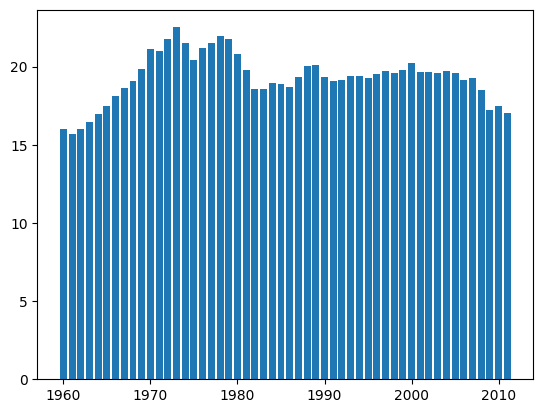

In [ ]:
#get the yearS
years=stage['Year'].values

#get the values
co2=stage['Value'].values

#create
plt.bar(years,co2)
plt.show()

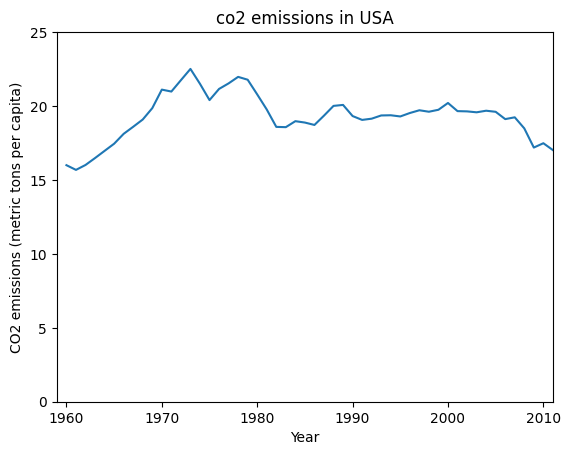

In [ ]:
#switch to a line plot
plt.plot(stage['Year'].values,stage['Value'].values)
#label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
#label the figure
plt.title('co2 emissions in USA')
#to make more honest,start the y axis at 0
plt.axis([1959,2011,0,25])

plt.show()



52


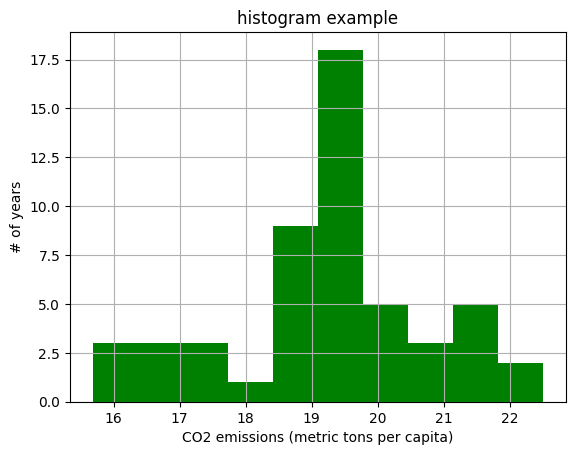

In [ ]:
#the histogram of the data
hist_data=stage['Value'].values
print(len(hist_data))
plt.hist(hist_data,10,density=False,facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of years')
plt.title('histogram example')

plt.grid(True)
plt.show()

In [ ]:
hist_indicator='CO2 emissions \(metric'
hist_year=2011
# Now try the original code again
mask1 = (data['IndicatorName'].str.contains(hist_indicator))
mask2 = (data['Year'].isin([hist_year]))
co2_2011 = data[mask1 & mask2]
co2_2011.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [ ]:
print(len(co2_2011))

232


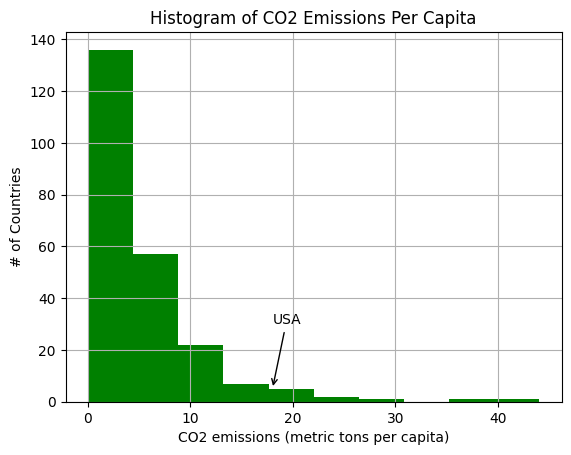

In [ ]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

plt.grid(True)
plt.show()

**RELATION BETWEEN GDP AND CO2 EMISSIONS IN USA**

In [ ]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [ ]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


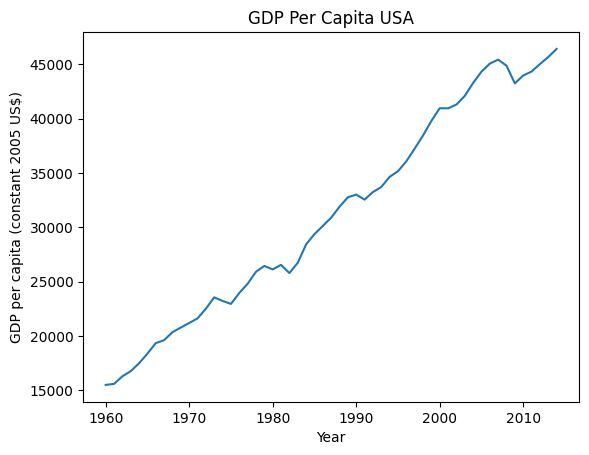

In [ ]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()


In [ ]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())


GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


In [ ]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))


52
52


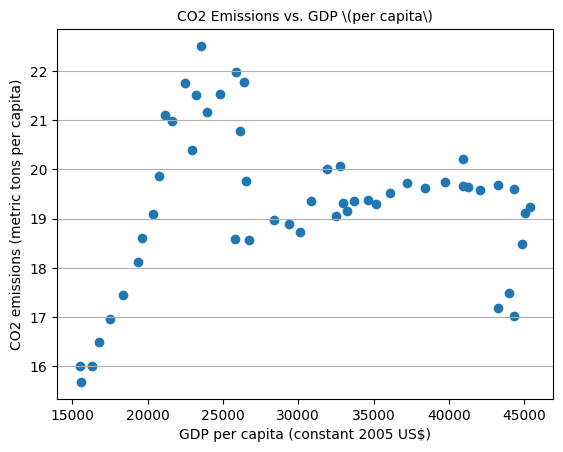

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[10],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()


**CORRELATION BETWEEN THE INDEPENDENT COLUMNS**

In [ ]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])


array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

In [ ]:
categorical_cols=pd.DataFrame(data.select_dtypes(include='object'))
categorical_cols

,CountryName,CountryCode,IndicatorName,IndicatorCode
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD
...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS


**LABEL ENCODING**

In [ ]:
#Label coding

for col in categorical_cols:
    print(f"LABEL ENCODING OF: {col}")
    le = LabelEncoder()
    print("Before Encoding:", data[col])
    data[col] = le.fit_transform(data[col])
    print("After Encoding:", data[col])
    print("*" * 100)

# Display final dataset
print("Final Dataset:\n", data)

LABEL ENCODING OF: CountryName
Before Encoding: 0          Arab World
1          Arab World
2          Arab World
3          Arab World
4          Arab World
              ...    
5656453      Zimbabwe
5656454      Zimbabwe
5656455      Zimbabwe
5656456      Zimbabwe
5656457      Zimbabwe
Name: CountryName, Length: 5656458, dtype: object
After Encoding: 0            7
1            7
2            7
3            7
4            7
          ... 
5656453    246
5656454    246
5656455    246
5656456    246
5656457    246
Name: CountryName, Length: 5656458, dtype: int64
****************************************************************************************************
LABEL ENCODING OF: CountryCode
Before Encoding: 0          ARB
1          ARB
2          ARB
3          ARB
4          ARB
          ... 
5656453    ZWE
5656454    ZWE
5656455    ZWE
5656456    ZWE
5656457    ZWE
Name: CountryCode, Length: 5656458, dtype: object
After Encoding: 0            5
1            5
2            5
3    

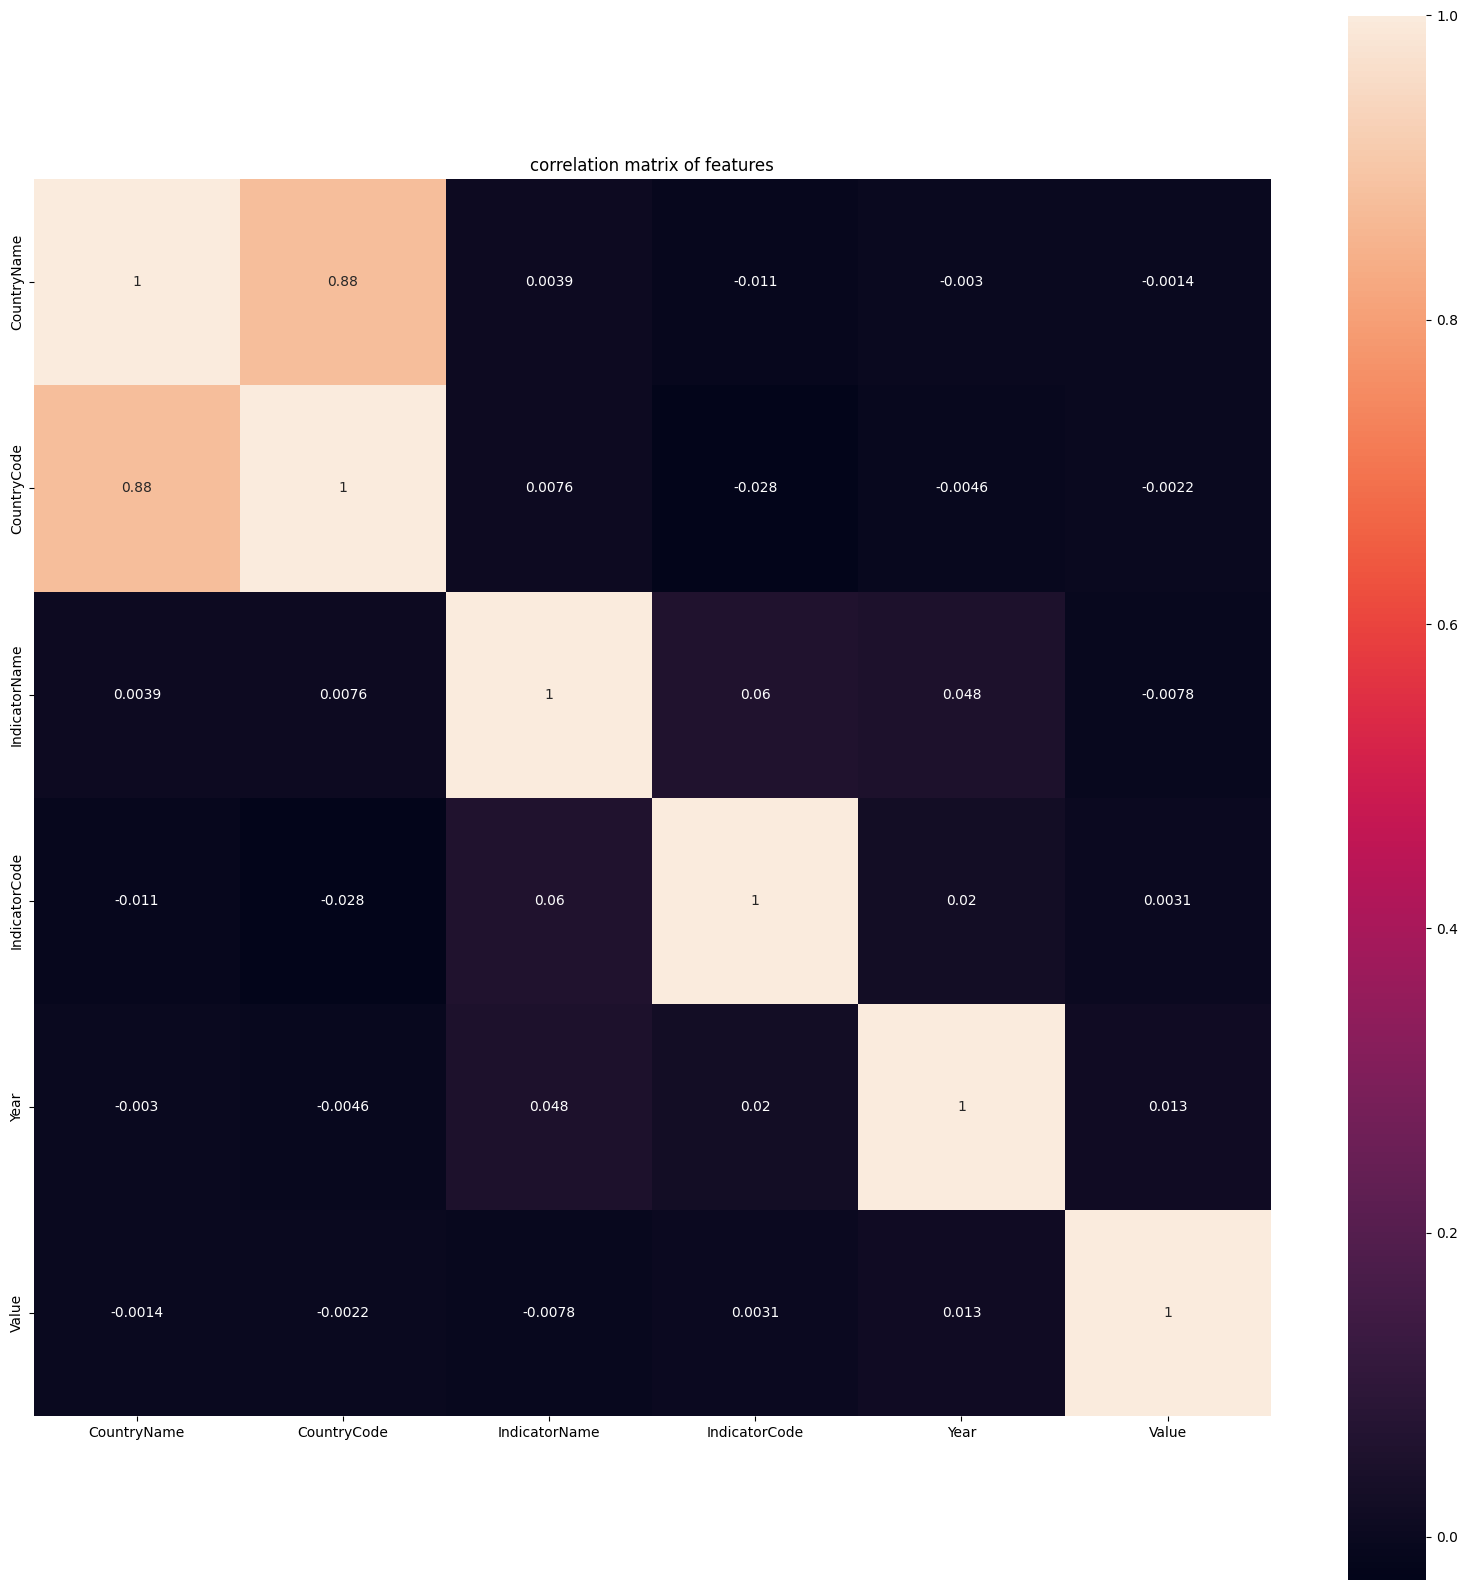

In [ ]:
#Perform correlation between all continuous features

corr = data.corr()#perform correlation between all continuous features
plt.subplots(figsize=(16,16)) ;
sns.heatmap(corr, annot=True, square=True)#plotting heatmap of correlations
plt.title("correlation matrix of features")
plt.tight_layout()
plt.show()


In [ ]:
#Creating the Dependent and Independent Variable

x=data.drop(['Value','IndicatorCode'],axis=1)
x=pd.DataFrame(x)
y=data['Value'] #Dependent feature
y=pd.DataFrame(y)

**SPLITTING DATA**

In [ ]:
#Splitting dataset into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4525166, 4)
(1131292, 4)
(4525166, 1)
(1131292, 1)


**TRAINING THE MODEL**

In [ ]:
#Training the model

from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(n_estimators=10,random_state=52,n_jobs=-1)
rand.fit(x_train,y_train)

<ipython-input-53-6c838af2cded>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=52)

In [ ]:
ypred = rand.predict(x_test)
print(ypred)

[2.23526022e+00 7.92900024e+01 4.63113569e+01 ... 9.33333333e+00
 3.45749686e+01 6.00578821e+09]


In [ ]:
#Accuracy score
#To check how well our model is performing on the test data
rand.score(x_train,y_train)

0.9829119449040941

In [ ]:
x_train


,CountryName,CountryCode,IndicatorName,Year
1937930,100,99,771,1990
2056226,102,101,104,1991
4291514,232,6,832,2006
1272651,211,202,1036,1983
4348108,34,40,382,2007
...,...,...,...,...
5030793,70,60,665,2011
491263,217,214,443,1972
3937352,237,233,750,2004
4686059,6,10,489,2009


In [ ]:
x_pred=['7','5','44','1961']

In [ ]:
rand.predict([x_pred])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([134.18303659])

**SAVING THE MODEL**

In [ ]:
#Saving our model by importing pickle file

import pickle
pickle.dump(rand, open('CO2.pickle', 'wb'))